In [1]:
%%bash

base_path=/mnt/c/Users/evogytis/repos/orthomyxo-metagenomics/data/full-segs

# ls $base_path

raxml=/mnt/c/Users/evogytis/repos/standard-RAxML/WindowsExecutables_v8.2.10/raxmlHPC.exe

for aln in $base_path/*.fasta
    do
    echo $aln
    
    dir=$(dirname $aln)
    seq=$(basename $aln)
    seg=${seq/.fasta/}
    
    cd $dir
    echo $seq
    
    out_stem=newick
        
    $raxml -s $seq -n $out_stem -m GTRGAMMA -p 666
    
    mv RAxML_bestTree.newick $seg.ml.newick
    
    rm RAxML*
    rm *.fasta.reduced
    
done;

/mnt/c/Users/evogytis/repos/orthomyxo-metagenomics/data/full-segs/NP.fasta
NP.fasta

RAxML can't, parse the alignment file as phylip file 
it will now try to parse it as FASTA file



IMPORTANT WARNING: Sequences CMS001_039|Culex_tarsalis|USA-CA|2017-08-24 and CMS001_043|Culex_tarsalis|USA-CA|2017-08-25 are exactly identical


IMPORTANT WARNING: Sequences CMS002_029c|Culex_tarsalis|USA-CA|2017-11-15 and CMS002_029d|Culex_tarsalis|USA-CA|2017-11-15 are exactly identical


IMPORTANT WARNING: Sequences mos191gb22262|Culex_globocoxitus|AUS|2015-09-15 and mos191X19029|Culex_australicus|AUS|2015-09-15 are exactly identical


IMPORTANT WARNING: Sequences mos191gb22262|Culex_globocoxitus|AUS|2015-09-15 and mos172gb65361|Culex_globocoxitus|AUS|2015-09-07 are exactly identical


IMPORTANT WARNING: Sequences mos191gb22262|Culex_globocoxitus|AUS|2015-09-15 and mos172X49967|Culex_australicus|AUS|2015-09-07 are exactly identical

IMPORTANT WARNING
Found 5 sequences that are exactly identical to othe

Best-scoring ML tree written to: C:\Users\evogytis\repos\orthomyxo-metagenomics\data\full-segs\RAxML_bestTree.newick

Overall execution time: 6.848604 secs or 0.001902 hours or 0.000079 days



rm: cannot remove '*.fasta.reduced': No such file or directory


/mnt/c/Users/evogytis/repos/orthomyxo-metagenomics/data/full-segs/PB2.fasta
PB2.fasta

RAxML can't, parse the alignment file as phylip file 
it will now try to parse it as FASTA file



IMPORTANT WARNING: Sequences mos191gb22262|Culex_globocoxitus|AUS|2015-09-15 and mos191X19029|Culex_australicus|AUS|2015-09-15 are exactly identical

IMPORTANT WARNING
Found 1 sequence that is exactly identical to other sequences in the alignment.
Normally they should be excluded from the analysis.

Just in case you might need it, an alignment file with 
sequence duplicates removed is printed to file PB2.fasta.reduced


Using BFGS method to optimize GTR rate parameters, to disable this specify "--no-bfgs" 



This is RAxML version 8.2.10 released by Alexandros Stamatakis on March 2017.

With greatly appreciated code contributions by:
Andre Aberer      (HITS)
Simon Berger      (HITS)
Alexey Kozlov     (HITS)
Kassian Kobert    (HITS)
David Dao         (KIT and HITS)
Sarah Lutteropp   (KIT and HITS)
Nick P

IMPORTANT WARNING: Sequences CMS001_002|Culex_tarsalis|USA-CA|2017-09-21 and CMS001_039|Culex_tarsalis|USA-CA|2017-08-24 are exactly identical


IMPORTANT WARNING: Sequences CMS002_029c|Culex_tarsalis|USA-CA|2017-11-15 and CMS002_029e|Culex_tarsalis|USA-CA|2017-11-15 are exactly identical


IMPORTANT WARNING: Sequences mos191gb22262|Culex_globocoxitus|AUS|2015-09-15 and mosWSB62413|Culex_quinquefasciatus|AUS|2015-08-19 are exactly identical


IMPORTANT WARNING: Sequences mos191gb22262|Culex_globocoxitus|AUS|2015-09-15 and mosWSX22048|Culex_australicus|AUS|2015-08-19 are exactly identical

IMPORTANT WARNING
Found 16 sequences that are exactly identical to other sequences in the alignment.
Normally they should be excluded from the analysis.

Just in case you might need it, an alignment file with 
sequence duplicates removed is printed to file hypothetical.fasta.reduced


Using BFGS method to optimize GTR rate parameters, to disable this specify "--no-bfgs" 



This is RAxML version 8.2.1



IMPORTANT WARNING: Sequences CMS001_039|Culex_tarsalis|USA-CA|2017-08-24 and CMS001_043|Culex_tarsalis|USA-CA|2017-08-25 are exactly identical


IMPORTANT WARNING: Sequences CMS001_039|Culex_tarsalis|USA-CA|2017-08-24 and CMS002_029c|Culex_tarsalis|USA-CA|2017-11-15 are exactly identical


IMPORTANT WARNING: Sequences CMS001_039|Culex_tarsalis|USA-CA|2017-08-24 and CMS002_029d|Culex_tarsalis|USA-CA|2017-11-15 are exactly identical


IMPORTANT WARNING: Sequences CMS001_036|Culex_tarsalis|USA-CA|2017-09-11 and CMS001_038|Culex_tarsalis|USA-CA|2017-08-24 are exactly identical


IMPORTANT WARNING: Sequences mos172gb65361|Culex_globocoxitus|AUS|2015-09-07 and mos172X49967|Culex_australicus|AUS|2015-09-07 are exactly identical


IMPORTANT WARNING: Sequences mos172gb65361|Culex_globocoxitus|AUS|2015-09-07 and mos191gb22262|Culex_globocoxitus|AUS|2015-09-15 are exactly identical


IMPORTANT WARNING: Sequences mos172gb65361|Culex_globocoxitus|AUS|2015-09-07 and mos191X19029|Culex_australicus|

In [2]:
import glob,os
import baltic as bt
import treetime

base_path='/mnt/c/Users/evogytis/repos/orthomyxo-metagenomics/data/full-segs'

for tree_path in glob.glob(os.path.join(base_path,'*.ml.newick')):
    print(tree_path)
    seg=os.path.basename(tree_path).split('.')[0]
    
    aln_path=os.path.join(os.path.dirname(tree_path),'%s.fasta'%(seg))
    date_path=os.path.join(os.path.dirname(tree_path),'dates.csv')
    
    dates={}
    precisions={}
    
    
    ll=bt.loadNewick(tree_path)
    ll.treeStats()
    
    for k in ll.getExternal():
        date=k.name.split('|')[-1]
        
        if len(date.split('-'))==3:
            dates[k.name]=bt.decimalDate(date)

        elif len(date.split('-'))==2:
            yr,mon=date.split('-')
            yr,mon=int(yr),int(mon)

            nyr,nmon=yr,mon
            nmon+=1
            if nmon>12: 
                nmon=1
                nyr+=1

            dates[k.name]=[bt.decimalDate('%s-01'%(date)),bt.decimalDate('%02d-%02d-01'%(nyr,nmon))]

        elif len(date.split('-'))==1:
            dates[k.name]=[int(date),int(date)+1]

    tt = treetime.TreeTime(tree=tree_path,dates=dates, aln=aln_path, gtr='HKY85')

    new_root=tt.reroot(root='least-squares')
    
    treetime.treetime.treetime_to_newick(tt,os.path.join(os.path.dirname(tree_path),'%s.rooted.newick'%(seg))) ## save tree

    tt.run(root='least-squares', infer_gtr=False, Tc='skyline', resolve_polytomies=False, max_iter=10,debug=True,time_marginal=False)

    tt.branch_length_to_years()

    treetime.treetime.treetime_to_newick(tt,os.path.join(os.path.dirname(tree_path),'%s.dated.newick'%(seg))) ## save tree

/mnt/c/Users/evogytis/repos/orthomyxo-metagenomics/data/full-segs/gp64.ml.newick

Tree height: 0.136735
Tree length: 0.250358

Numbers of objects in tree: 60 (29 nodes and 31 leaves)


0.00	-TreeAnc: set-up

0.04	-SequenceData: loaded alignment.

0.04	-SeqData: making compressed alignment...

0.09	-SequenceData: constructed compressed alignment...

0.10	-WARNING: character M is unknown. Treating it as missing information

0.10	-WARNING: character N is unknown. Treating it as missing information

0.10	-WARNING: character R is unknown. Treating it as missing information

0.10	-WARNING: character Y is unknown. Treating it as missing information
0.10	--ClockTree: Setting precision to level 1

0.10	-ClockTree._assign_dates: assigned date contraints to 31 out of 31 tips.

0.10	TreeTime.reroot: with method or node: least-squares

0.10	TreeTime.reroot: rerooting will ignore covariance and shared ancestry.
0.10	--TreeTime._find_best_root: searching for the best root position...
0.14	--TreeTime.

10.56	--ClockTree - Joint reconstruction:  Propagating root -> leaves...

10.57	-TreeAnc.infer_ancestral_sequences with method: ml, joint
10.57	--TreeAnc._ml_anc_joint: type of reconstruction: Joint

10.59	###TreeTime.run: ITERATION 5 out of 10 iterations

10.59	-TreeTime.run: adding coalescent prior with Tc=const
10.70	--optimized Tc to 0.018164

10.70	-ClockTree: Maximum likelihood tree optimization with temporal constraints
10.70	--ClockTree.init_date_constraints...
10.70	--ClockTree.init_date_constraints: Initializing branch length
     	  interpolation objects...
11.05	--ClockTree.date2dist: Setting new molecular clock. rate=1.532e-03,
     	  R^2=0.4277
11.05	--ClockTree.init_date_constraints: node date constraints objects...
11.05	--ClockTree - Joint reconstruction:  Propagating leaves -> root...
12.04	--ClockTree - Joint reconstruction:  Propagating root -> leaves...

12.05	-TreeAnc.infer_ancestral_sequences with method: ml, joint
12.05	--TreeAnc._ml_anc_joint: type of reconstr

1.37	--ClockTree.date2dist: Setting new molecular clock. rate=1.193e-03,
    	  R^2=0.7310
1.37	--ClockTree.init_date_constraints: node date constraints objects...
1.38	--ClockTree - Joint reconstruction:  Propagating leaves -> root...
2.63	--ClockTree - Joint reconstruction:  Propagating root -> leaves...

2.64	TreeTime.reroot: with method or node: least-squares

2.64	TreeTime.reroot: rerooting will ignore covariance and shared ancestry.
2.64	--TreeTime._find_best_root: searching for the best root position...
2.73	--TreeTime.reroot: Tree was re-rooted to node NODE_0000003
2.78	--ClockTree.date2dist: Setting new molecular clock. rate=1.619e-04,
    	  R^2=0.0954

2.78	###TreeTime.run: rerunning timetree after rerooting

2.78	-TreeAnc.optimize_tree: sequences...

2.78	-TreeAnc.infer_ancestral_sequences with method: probabilistic, joint
2.78	--TreeAnc._ml_anc_joint: type of reconstruction: Joint

2.80	-TreeAnc.optimize_branch_length: running branch length optimization using
    	 jointML

27.77	--optimized Tc to 0.007102

27.77	-ClockTree: Maximum likelihood tree optimization with temporal constraints
27.77	--ClockTree.init_date_constraints...
27.77	--ClockTree.init_date_constraints: Initializing branch length
     	  interpolation objects...
28.74	--ClockTree.date2dist: Setting new molecular clock. rate=6.834e-04,
     	  R^2=0.5941
28.74	--ClockTree.init_date_constraints: node date constraints objects...
28.75	--ClockTree - Joint reconstruction:  Propagating leaves -> root...
30.85	--ClockTree - Joint reconstruction:  Propagating root -> leaves...

30.85	-TreeAnc.infer_ancestral_sequences with method: ml, joint
30.85	--TreeAnc._ml_anc_joint: type of reconstruction: Joint

30.91	###TreeTime.run: ITERATION 10 out of 10 iterations

30.91	-TreeTime.run: adding coalescent prior with Tc=skyline
30.93	--Coalescent:optimize_skyline:... current LH: 96.092686
36.97	--Coalescent:optimize_skyline:...done. new LH: 232.912908
36.97	--optimized a skyline

36.97	-ClockTree: Maximum l

10.54	--ClockTree - Joint reconstruction:  Propagating root -> leaves...

10.55	-TreeAnc.infer_ancestral_sequences with method: ml, joint
10.55	--TreeAnc._ml_anc_joint: type of reconstruction: Joint

10.57	###TreeTime.run: ITERATION 3 out of 10 iterations

10.57	-TreeTime.run: adding coalescent prior with Tc=const
10.91	--optimized Tc to 0.013288

10.91	-ClockTree: Maximum likelihood tree optimization with temporal constraints
10.91	--ClockTree.init_date_constraints...
10.91	--ClockTree.init_date_constraints: Initializing branch length
     	  interpolation objects...
11.37	--ClockTree.date2dist: Setting new molecular clock. rate=3.422e-03,
     	  R^2=0.8093
11.37	--ClockTree.init_date_constraints: node date constraints objects...
11.37	--ClockTree - Joint reconstruction:  Propagating leaves -> root...
13.58	--ClockTree - Joint reconstruction:  Propagating root -> leaves...

13.59	-TreeAnc.infer_ancestral_sequences with method: ml, joint
13.59	--TreeAnc._ml_anc_joint: type of reconstr

limit_output extension: Maximum message size of 40000 exceeded with 40077 characters

PB1
PB2
PA
NP
gp64
hypothetical
hypothetical2
hypothetical3


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


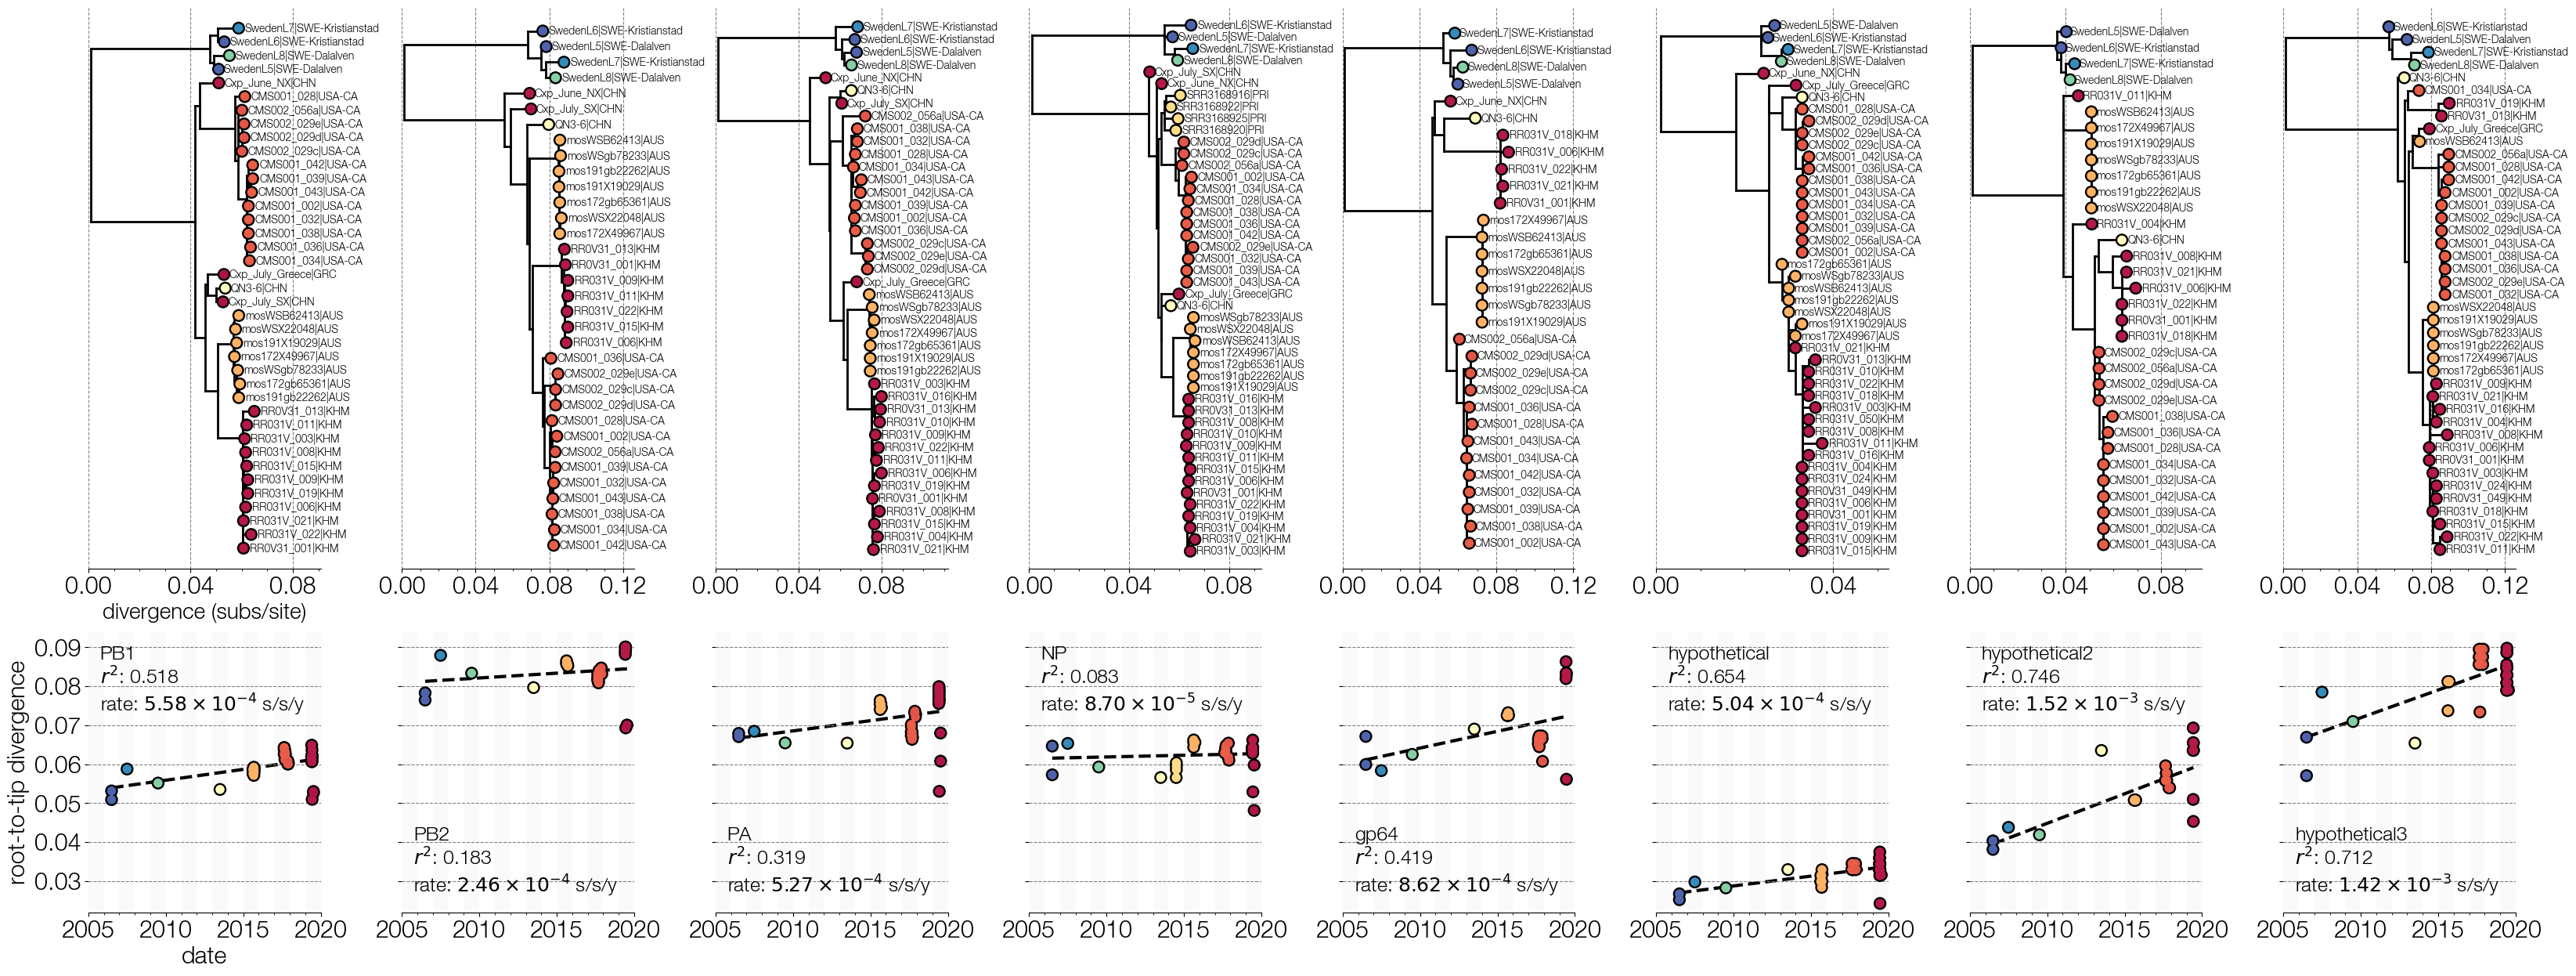

In [1]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import gridspec

import glob,os
import baltic as bt
import numpy as np

typeface='Helvetica Neue'

mpl.rcParams['font.weight']=300
mpl.rcParams['axes.labelweight']=300
mpl.rcParams['font.family']=typeface
mpl.rcParams['font.size']=22

base_path='/mnt/c/Users/evogytis/repos/orthomyxo-metagenomics/data/full-segs'

fig = plt.figure(figsize=(40, 15),facecolor='w') 
gs = gridspec.GridSpec(2, 8,height_ratios=[2,1],wspace=0.35,hspace=0.15) ## setup figure with two columns

segments=['PB1','PB2','PA','NP','gp64','hypothetical','hypothetical2','hypothetical3']
# glob.glob(os.path.join(base_path,'*.dated.newick'))
for t,tree_path in enumerate([os.path.join(base_path,'%s.rooted.newick'%(s)) for s in segments]):
    seg=os.path.basename(tree_path).split('.')[0]
    print(seg)
    
    ax = plt.subplot(gs[0,t])
    
#     date_path=os.path.join(os.path.dirname(tree_path),'dates.csv')
    
    ll=bt.loadNewick(tree_path) ## load rooted tree
    ll.sortBranches()
    
    dates={}
    for k in ll.getExternal():
        date=k.name.split('|')[-1]
        
        if len(date.split('-'))==3:
            dates[k.name]=bt.decimalDate(date)

        elif len(date.split('-'))==2:
            yr,mon=date.split('-')
            yr,mon=int(yr),int(mon)

            nyr,nmon=yr,mon
            nmon+=1
            if nmon>12: 
                nmon=1
                nyr+=1

            dates[k.name]=[bt.decimalDate('%s-01'%(date)),bt.decimalDate('%02d-%02d-01'%(nyr,nmon))]

        elif len(date.split('-'))==1:
            dates[k.name]=[int(date),int(date)+1]
            
    
    
    

    max_date=max([max(d) if isinstance(d,list) else d for d in dates.values()])
    
#     ll.setAbsoluteTime(max_date)
#     x_attr=lambda k: k.absoluteTime
    ll.plotTree(ax)
    
    text=lambda k: '%s|%s'%(k.name.split('|')[0],k.name.split('|')[2])
    ll.addText(ax,x_attr=lambda k: 1.04*k.height,text=text,size=10,va='center',clip_on=False)

    ax.set_yticks([])
    ax.set_yticklabels([])


    ax.grid(axis='x',ls='--',color='grey')
    [ax.spines[loc].set_visible(False) for loc in ax.spines if loc not in ['bottom']]
    
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.04))
    
    
#     ax.set_xlim(min(dates.values()),max(dates.values()))
    ax.set_xlim(0,ll.treeHeight*1.4)
    ax.set_ylim(-1,ll.ySpan+1)
    ax.plot()
    
    ########################
    ax2 = plt.subplot(gs[1,t])

#     ll2=bt.loadNewick(os.path.join(os.path.dirname(tree_path),'%s.dated.newick'%(seg)))

#     tip_dates={k.name: k.absoluteTime for k in ll.getExternal()}
#     tip_heights={k.name: k.height for k in ll2.getExternal()}

    tips=ll.getExternal()
    xs=[np.mean(dates[k.name]) if isinstance(dates[k.name],list) else dates[k.name] for k in tips]
    ys=[k.height for k in tips]
    
    ##################
    from scipy.stats import linregress
    import numpy as np

    slope,intercept,rval,pval,stderr=linregress(xs,ys)

    x_grid=np.linspace(min(xs),max(xs),100)
    ax2.plot(x_grid,[slope*x+intercept for x in x_grid],lw=3,ls='--',color='k',zorder=0)
    ###################
    
    s=70
#     ax2.scatter(xs,ys,s=s,facecolor='lightgrey',edgecolor='none',zorder=100)
#     ax2.scatter(xs,ys,s=s*2,facecolor='k',edgecolor='none',zorder=99)

    ########
    cmap=mpl.cm.Spectral_r
    
    norm=mpl.colors.Normalize(2006,2020)
    
    ax2.scatter(xs,ys,s=s,facecolor=[cmap(norm(bt.decimalDate(k.name.split('|')[-1],variable=True))) for k in tips],edgecolor='none',zorder=100)
    ax2.scatter(xs,ys,s=s*2,facecolor='k',edgecolor='none',zorder=99)
    
    ll.plotPoints(ax,colour=lambda k: k.is_leaf() and cmap(norm(bt.decimalDate(k.name.split('|')[-1],variable=True))),size=s)
    
    ########
    
    fmt=lambda y: r'$%.2f\times10^{%d}$'%(y*(10**-int(np.log10(y/10))),int(np.log10(y/10)))
    
    y=0.95
    va='top'
    if seg in ['PB2','PA','gp64','hypothetical3']:
        y=0.05
        va='bottom'
        
    ax2.text(0.05,y,'%s\n$r^{2}$: %.3f\nrate: %s s/s/y'%(seg,rval,fmt(slope)),size=18,zorder=1000,transform=ax2.transAxes,ha='left',va=va)
    ####################
    
#     ax2.set_xlim(ax.get_xlim())
    ax2.grid(axis='y',ls='--',color='grey')
    
    
    
    if t==0:
        ax.set_xlabel('divergence (subs/site)',size=20)
        ax2.set_xlabel('date')
        ax2.set_ylabel('root-to-tip divergence')
    else:
        ax2.set_yticklabels([])
    
    everyM=5
    everym=1
    ax2.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(everym))
    ax2.xaxis.set_major_locator(mpl.ticker.MultipleLocator(everyM))
    
    [ax2.axvspan(t,t+everym,fc='k',ec='none',zorder=0,alpha=0.02) for i,t in enumerate(sorted(list(ax2.get_xticks())+list(ax2.get_xticks(minor=True)))) if i%2==0]
    
    ax2.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.01))
    
    [ax2.spines[loc].set_visible(False) for loc in ax2.spines if loc not in ['bottom']]
    
    ax2.set_xlim(2005,2020)
    ax2.set_ylim(0.022,0.094)
    
plt.savefig('/mnt/c/Users/evogytis/repos/orthomyxo-metagenomics/manuscript/JournalOfVirology-revision1/SuppFig1_segRTT.png',bbox_inches='tight',dpi=300)
plt.savefig('/mnt/c/Users/evogytis/repos/orthomyxo-metagenomics/manuscript/JournalOfVirology-revision1/SuppFig1_segRTT.tiff',bbox_inches='tight',dpi=100)

plt.savefig('/mnt/c/Users/evogytis/repos/orthomyxo-metagenomics/manuscript/JournalOfVirology-revision1/SuppFig1_segRTT.pdf',bbox_inches='tight',dpi=300)
plt.savefig('/mnt/c/Users/evogytis/repos/orthomyxo-metagenomics/manuscript/JournalOfVirology-revision1/SuppFig1_segRTT.eps',bbox_inches='tight',dpi=300)

plt.show()

PB1 2400
PB2 2358
PA 2154
NP 1683
gp64 1446
hypothetical 666
hypothetical2 537
hypothetical3 529
0.000605899250688412 -1.1538822362450374 0.7805554840158245


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


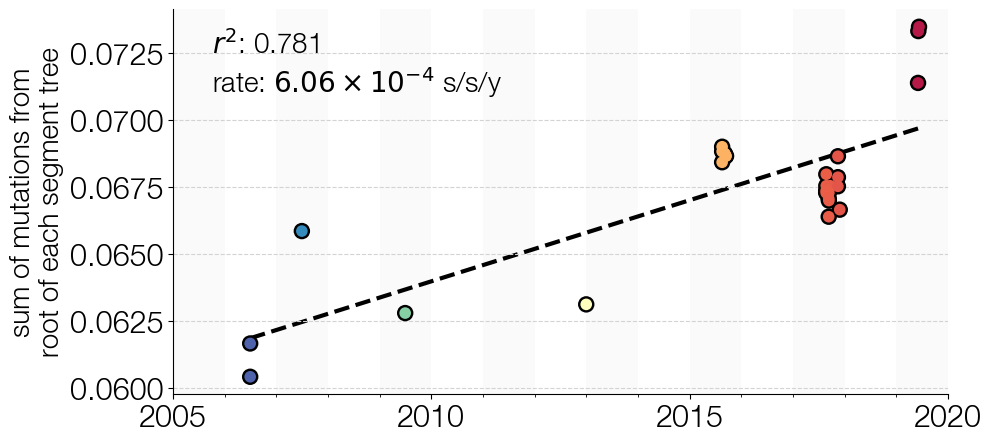

In [2]:
from Bio import SeqIO

fig = plt.figure(figsize=(10, 5),facecolor='w') 
gs = gridspec.GridSpec(1, 1) ## setup figure with two columns

ax = plt.subplot(gs[0])

segments=['PB1','PB2','PA','NP','gp64','hypothetical','hypothetical2','hypothetical3']
# glob.glob(os.path.join(base_path,'*.dated.newick'))
tip_xs={}
tip_ys={}
segL=[]

for t,tree_path in enumerate([os.path.join(base_path,'%s.rooted.newick'%(s)) for s in segments]):
    seg=os.path.basename(tree_path).split('.')[0]
    
    seqL=None
    for seq in SeqIO.parse(os.path.join(base_path,'%s.fasta'%(seg)),'fasta'):
        seqL=len(seq.seq)
        
    segL.append(seqL)
    print(seg,seqL)
    
    ll=bt.loadNewick(tree_path) ## load rooted tree
    ll.sortBranches()
    
    tips=ll.getExternal()
    tip_xs[seg]={k.name: bt.decimalDate(k.name.split('|')[-1],variable=True) for k in tips}
    tip_ys[seg]={k.name: k.height*seqL for k in tips}
    
from collections import Counter

all_tips=sum([list(tip_xs[s].keys()) for s in tip_xs],[])
count=Counter(all_tips)
shared_tips=set()
for t in count:
#     print(t,count[t])
    if count[t]==8:
        shared_tips.add(t)


xs=[tip_xs['PB1'][t] for t in shared_tips]
ys=[sum([tip_ys[s][t] for s in tip_ys])/sum(segL) for t in shared_tips]

########################
slope,intercept,rval,pval,stderr=linregress(xs,ys)
print(slope,intercept,rval)
x_grid=np.linspace(min(xs),max(xs),100)
ax.plot(x_grid,[slope*x+intercept for x in x_grid],lw=3,ls='--',color='k',zorder=1)

ax.text(0.05,0.95,'$r^{2}$: %.3f\nrate: %s s/s/y'%(rval,fmt(slope)),size=20,zorder=1000,transform=ax.transAxes,ha='left',va='top')


########################

cmap=mpl.cm.Spectral_r
    
norm=mpl.colors.Normalize(2006,2020)

ax.scatter(xs,ys,s=s,facecolor=[cmap(norm(bt.decimalDate(k.split('|')[-1],variable=True))) for k in shared_tips],edgecolor='none',zorder=100)
ax.scatter(xs,ys,s=s*2,facecolor='k',edgecolor='none',zorder=99)
########################
everym=1
everyM=5
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(everym))
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(everyM))

# ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(25))


ax.set_xlim(2005,2020)
# ax.set_ylim(0.44,0.58)

ax.grid(axis='y',ls='--',color='lightgrey',zorder=0)

[ax.axvspan(t,t+everym,fc='k',ec='none',zorder=0,alpha=0.02) for i,t in enumerate(sorted(list(ax.get_xticks())+list(ax.get_xticks(minor=True)))) if i%2==0]

[ax.spines[loc].set_visible(False) for loc in ax.spines if loc not in ['left','bottom']]

ax.set_ylabel('sum of mutations from\nroot of each segment tree',size=20)

plt.savefig('/mnt/c/Users/evogytis/repos/orthomyxo-metagenomics/manuscript/JournalOfVirology-revision1/SuppFig2_genomeRTT.png',bbox_inches='tight',dpi=300)
plt.savefig('/mnt/c/Users/evogytis/repos/orthomyxo-metagenomics/manuscript/JournalOfVirology-revision1/SuppFig2_genomeRTT.tiff',bbox_inches='tight',dpi=100)
plt.savefig('/mnt/c/Users/evogytis/repos/orthomyxo-metagenomics/manuscript/JournalOfVirology-revision1/SuppFig2_genomeRTT.pdf',bbox_inches='tight',dpi=300)
plt.savefig('/mnt/c/Users/evogytis/repos/orthomyxo-metagenomics/manuscript/JournalOfVirology-revision1/SuppFig2_genomeRTT.eps',bbox_inches='tight',dpi=300)

plt.show()